<IPython.core.display.Javascript object>


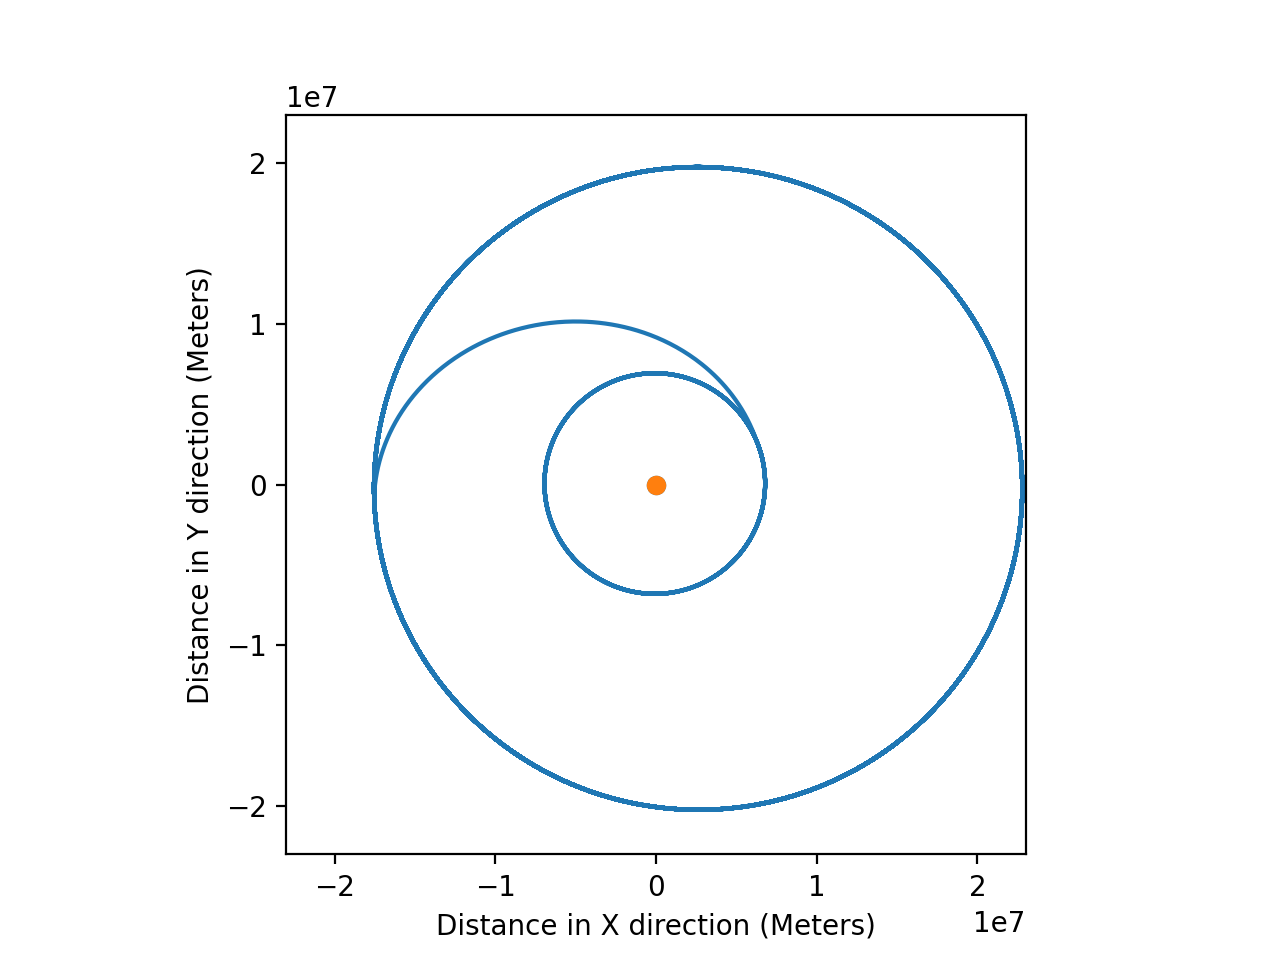

267749.43434168247
266299.00026474614
total time for leaving Earth's Orbit:  25 days
Max distance from the earth in orbit:  14291.533 miles


<IPython.core.display.Javascript object>


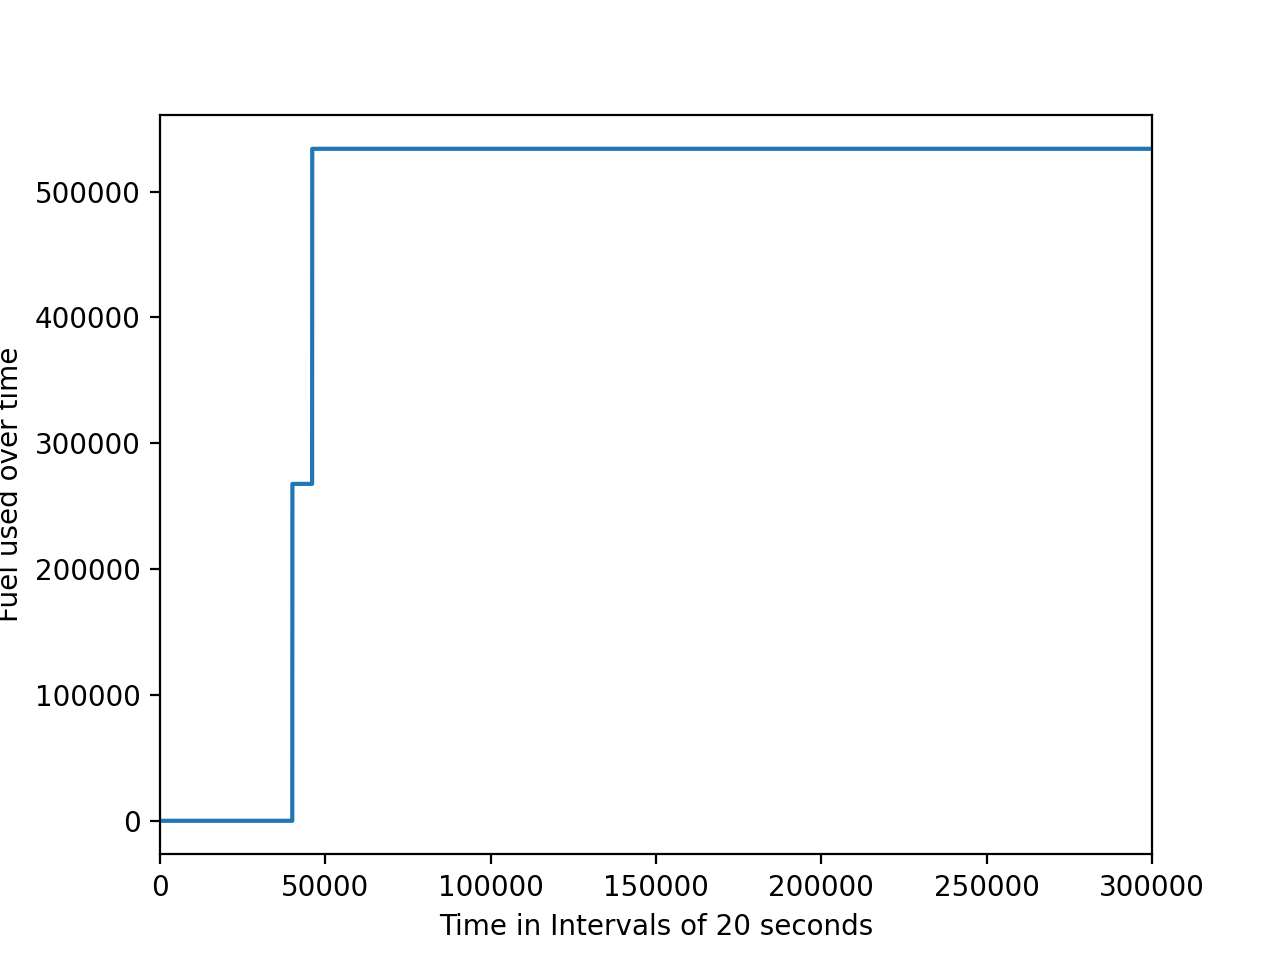

total fuel used:  534048.4346064286


In [28]:
%matplotlib notebook
import math
import matplotlib.pyplot as plt
import pandas as pd
from itertools import count
from IPython import display
import numpy as np 
from matplotlib.animation import FuncAnimation
fig = plt.figure()

massEarth = 5.972 * (10**24)
massSat = 4989516.07 #420000
g = 6.67 * (10**-11)
# Earth's Position
ep_x = 0
ep_y = 0
x_coordinates = [ep_x]
y_coordinates = [ep_y]

totalTime = 25
plt.scatter(x_coordinates, y_coordinates)
#plt.show()

rad = 420000 + (6.371 * (10**6))
# dt 
dt = 20

# rocket position and velocity initially 
np_x = rad
np_y = 0

nv_x = 0
nv_y = 7700
vel = 0
# total acc
acc = 0 
marsAcc = 0 
#components of acceleration
acc_x = 0 
acc_y = 0 

m_x = 0

theta = 0

#just some vars i am using to make this run only 5 times at for now
thing = 1 
counter = 0 

xList = [np_x]
yList =[np_y]

maxPeriod = 100000000000000000 
#loop
ctrl = 0
ctrl2 = 0
ctrl3 = 0
ctrl4 = 0
ctrl5 = 0
ctrl6 = 0
ctrl7 = 0 
ctrl8 = 0




#fuel variables

chngVel = 0
exhaustVel = 3000
massBefore = 944546.7677
fuelUsed = 0
fuelList = [0]
timeList = [0]
def rocketEquation (chng, exhaust, massBefore):
    massAfter = massBefore/(math.e**(chng/exhaust))
    print(massBefore-massAfter)
    return massBefore - massAfter 


while thing == 1:
    #print("Counter:  ",counter)
    #finding next position
    period = math.sqrt((4.0 * ((math.pi)**2)*(rad**3))/(g*massEarth))
       # print(maxPeriod)
    if ( period < 5700 and ctrl < 1 and 2200 > counter > 2000) :
        #vel = math.sqrt((nv_y**2) + (nv_x**2))
        
        #nv_y += 582
        vel = math.sqrt((nv_x**2)+(nv_y**2))
        vel += 1500
        fuelUsed = rocketEquation(1000,exhaustVel,massBefore)
        massBefore = massBefore - fuelUsed
        fuelList.append(fuelUsed)
        timeList.append(counter*dt)
      
        nv_y = math.sqrt((vel**2) - (nv_x**2))
       # nv_x = math.sqrt((vel**2) - (nv_y**2))

        ctrl += 1 
    elif ( ctrl2 < 1 and 2400 > counter > 2300) :
        #vel = math.sqrt((nv_y**2) + (nv_x**2))
        
        #nv_y += 582
        vel = math.sqrt((nv_x**2)+(nv_y**2))
        vel += 1500
        fuelUsed = rocketEquation(1500,exhaustVel,massBefore)
        massBefore = massBefore - fuelUsed
        fuelList.append(fuelUsed)
        timeList.append(counter*dt)
        nv_y = math.sqrt((vel**2) - (nv_x**2))
       # nv_x = math.sqrt((vel**2) - (nv_y**2))

        ctrl2 += 1 
   
 
    else: 
    
        timeList.append(counter*dt)
        fuelList.append(0)

    np_x = np_x + (dt*nv_x )
   
    np_y = np_y + (dt*nv_y )
    # finding the acceleteration in components
    if np_y == 0 : 
        acc = np_x
    if np_y != 0:
        rad = math.sqrt(((np_x - ep_x)**2) + ((np_y - ep_y)**2))
       # print("rad:  ",rad)
        acc = -(g * massEarth)/((rad)**2)
       # print("acc:  ",acc)
        theta = math.atan2(np_x,np_y)
        #print("Theta:  ",theta)

    # Dividing into components 
    acc_x = math.sin(theta) * acc
    acc_y = math.cos(theta) * acc 
    
    
    # finding next Velocity 
    nv_x = nv_x + (dt * acc_x)
    nv_y = nv_y + (dt * acc_y)


    x1_coordinates = [ep_x,np_x]
    y1_coordinates = [ep_y,np_y]

  
    xList.append(np_x)
    yList.append(np_y)
    if counter > (25 * 24 * 60 * 60)/dt :
        thing = 0
       
    counter += 1


ep_x = 0
ep_y = 0     
x_coordinates = [ep_x]     
y_coordinates = [ep_y]       
plt.scatter(x_coordinates, y_coordinates)  
plt.xlabel("Distance in X direction (Meters)")
plt.ylabel("Distance in Y direction (Meters)")
#x_m = [mp_x]
#y_m = [mp_y]
#plt.scatter(x_m,y_m)
limSize = 23e6
plt.xlim([-limSize,limSize])                         
plt.ylim([-limSize,limSize])
maxFromEarth = (limSize) * 0.000621371
plot1 = plt.figure(1)
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(xList,yList)
plt.show()
print("total time for leaving Earth's Orbit: ", totalTime, "days")
print("Max distance from the earth in orbit: ", maxFromEarth, "miles" )

plot2 = plt.figure(2)

plt.xlim([0,300000])
#plt.ylim([,])
plt.plot(timeList,np.cumsum(fuelList))
plt.xlabel("Time in Intervals of 20 seconds")
plt.ylabel("Fuel used over time")
totalFuel = sum(fuelList)
print("total fuel used: ", totalFuel)
plt.show()

